In [18]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [19]:
CONF_FILE = "results/configuration_2023-06-27T23:46:58.101969.json"
STAT_FILE = "results/stats_500_2023-06-27T23:46:58.101969.json"

In [20]:
with open(CONF_FILE, "r") as f:
    config = json.load(f)

In [21]:
config["main_widget"]

{'//Regions configuration': 'Below you configure regions',
 'regions': [{'name': 'Poland',
   'vertices': [[0, 0], [150, 30], [300, 0], [300, 100], [50, 100], [0, 0]],
   'color': 'red',
   'wealth_percent': 70,
   'number_of_healthy_agents': 40,
   '//infected_agents_comment': 'array of Tuples [number of infected agents, virus name]',
   'number_of_infected_agents': [[20, 'Covid']],
   'has_airport': True,
   'close_airport': 0.4},
  {'name': 'Germany',
   'vertices': [[310, 0], [460, 0], [460, 150], [310, 150], [310, 0]],
   'color': 'blue',
   'wealth_percent': 100,
   'number_of_healthy_agents': 100,
   '//infected_agents_comment': 'array of Tuples [number of infected agents, virus name]',
   'number_of_infected_agents': [[30, 'Covid'], [20, 'Flu']],
   'has_airport': True,
   'close_airport': 0.6}],
 '//Virus configuration': 'Below you configure viruses - default numer of viruses is 1, sick time and immunity time is in steps, death odds in %',
 'viruses': [{'name': 'Covid',
   'de

In [22]:
with open(STAT_FILE, "r") as f:
    stats = json.load(f)

In [23]:
stats["region_names"], stats["virus_names"]

(['Poland', 'Germany'], ['Covid', 'Flu'])

In [24]:

def plot(plot_data):
    plt.figure(figsize=(7, 7))
    for arr, color, label in plot_data:
        plt.plot(arr, color=color, label=label)
    plt.legend()
    plt.show()

def plot_sick_statistics(region_name, virus_name, window_size=100, last_point=None):
    data = stats["sick_data"][region_name][virus_name]
    if last_point is None:
        last_point = len(data["healthy"])
    h = data["healthy"][last_point-window_size:last_point]
    s = data["sick"][last_point-window_size:last_point]
    i = data["immune"][last_point-window_size:last_point]
    plot_data = [
        (h, "green", "not infected"),
        (s, "red", "sick"),
        (i, "blue", "immune"),
    ]
    plot(plot_data)

def plot_global_statistics(region_name, window_size=100, last_point=None):
    data = stats["global_data"][region_name]
    if last_point is None:
        last_point = len(data["healthy"])
    h = data["healthy"][last_point-window_size:last_point]
    s = data["sick"][last_point-window_size:last_point]
    d = data["deaths"][last_point-window_size:last_point]
    plot_data = [
        (h, "green", "healthy"),
        (s, "red", "sick"),
        (d, "black", "deaths"),
    ]
    plot(plot_data)

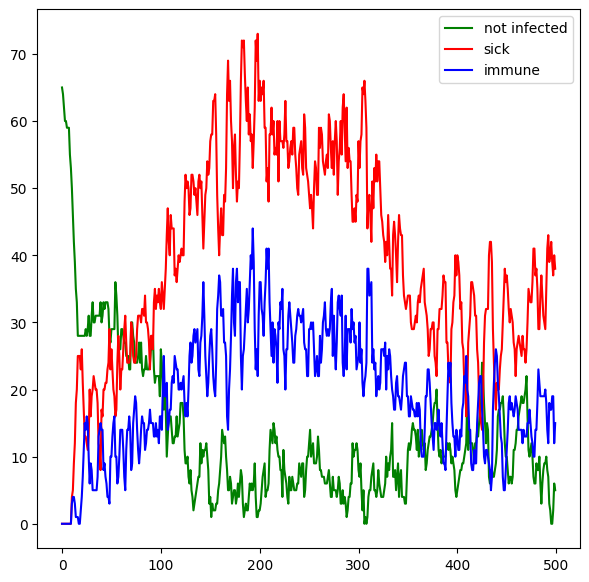

In [25]:
plot_sick_statistics("Poland", "Flu", 500)

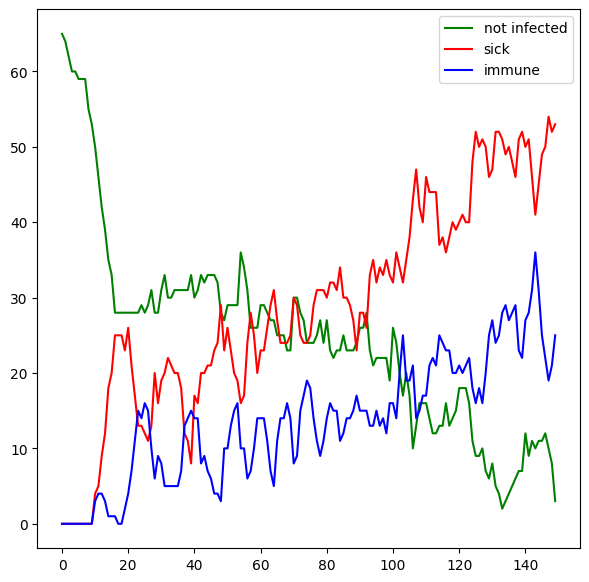

In [26]:
plot_sick_statistics("Poland", "Flu", 150, 150)

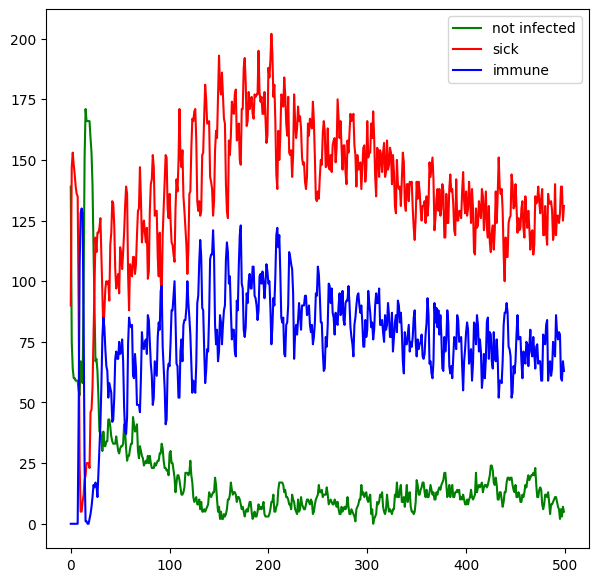

In [27]:
plot_sick_statistics("world", "Flu", 500)

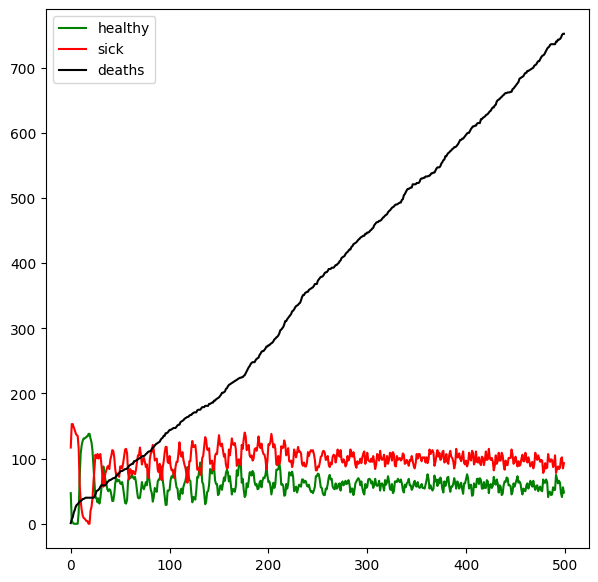

In [28]:
plot_global_statistics("Germany", 500)